## Diabetes

Este conjunto de dados é originalmente do National Institute of Diabetes and Digestive and Kidney
Doenças. O objetivo do conjunto de dados é prever de forma diagnóstica se um paciente tem diabetes,
com base em certas medições de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas
na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres
pelo menos 21 anos de herança indígena.

## Dicionário
Informações sobre atributos do conjunto de dados

Pregnancies: Para expressar o número de gestações

Glucose: Para expressar o nível de glicose no sangue

BloodPressure: Para expressar a medição da pressão arterial

SkinThickness: Para expressar a espessura da pele

Insulin: Para expressar o nível de insulina no sangue

BMI: Para expressar o índice de massa corporal

DiabetesPedigreeFunction: Para expressar a porcentagem de Diabetes

Age: Para expressar a idade

Outcome: Para expressar o resultado final 1 é Sim e 0 é Não

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import scipy


In [2]:
df = pd.read_csv('C:/Users/Pichau/Desktop/Trabalho/diabetesLimpo.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,212.371155,33.6,0.627,50,1
1,1,85.0,66.0,71.334676,26.6,0.351,31,0
2,8,183.0,64.0,290.724754,23.3,0.672,32,1
3,1,89.0,66.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,168.000000,43.1,2.288,33,1


In [4]:
df.shape

(729, 8)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
previsores = df.iloc[:, 0:8].values

## ATRIBUTOS PREVISORES E ALVO

In [7]:
previsores

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
previsores.shape

(729, 8)

In [9]:
alvo = df.iloc[:, 7].values

In [10]:
alvo

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [11]:
alvo.shape

(729,)

## Análise das escalas dos atributos (Escalonamento)

Padronização (utiliza a média e o desvio padrão como referência).

## RESUMO PRÉ-PROCESSAMENTO

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.858711,121.928098,72.367627,154.081766,32.469959,0.474117,33.318244,0.344307
std,3.357468,30.676094,12.375838,98.805480,6.885098,0.331649,11.753078,0.475468
min,0.000000,44.000000,24.000000,-20.450968,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,90.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,131.778882,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,191.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [15]:
previsores_esc

array([[ 0.63820698,  0.85049297, -0.02972561, ...,  0.46129612,
         1.42032657,  1.37999365],
       [-0.85203289, -1.20463353, -0.51487412, ..., -0.37148054,
        -0.19738113, -0.72464102],
       [ 1.23430293,  1.99222991, -0.67659029, ...,  0.59707492,
        -0.11223862,  1.37999365],
       ...,
       [ 0.34015901, -0.03027553, -0.02972561, ..., -0.69131506,
        -0.28252364, -0.72464102],
       [-0.85203289,  0.13282975, -1.00002264, ..., -0.37751516,
         1.16489904,  1.37999365],
       [-0.85203289, -0.94366509, -0.19144178, ..., -0.48010358,
        -0.87852121, -0.72464102]])

In [16]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,0.638207,0.850493,-0.029726,0.590346,0.164241,0.461296,1.420327,1.379994
1,-0.852033,-1.204634,-0.514874,-0.838050,-0.853145,-0.371481,-0.197381,-0.724641
2,1.234303,1.992230,-0.676590,1.383899,-1.332770,0.597075,-0.112239,1.379994
3,-0.852033,-1.074149,-0.514874,-0.608499,-0.635134,-0.926665,-1.048806,-0.724641
4,-1.150081,0.491661,-2.617184,0.140962,1.544980,5.473043,-0.027096,1.379994
...,...,...,...,...,...,...,...,...
724,1.830399,-0.682697,0.293707,0.262496,0.062503,-0.914596,2.527179,-0.724641
725,-0.553985,0.002346,-0.191442,0.000849,0.629332,-0.404671,-0.537951,-0.724641
726,0.340159,-0.030276,-0.029726,-0.426198,-0.911282,-0.691315,-0.282524,-0.724641
727,-0.852033,0.132830,-1.000023,0.091541,-0.344452,-0.377515,1.164899,1.379994


## BASE DE TREINO E TESTE

Parâmetros train_test_split:
arrays: nomes dos atributos previsores e alvo.
test_size: tamanho em porcentagem dos dados de teste. default é none.
train_size: tamanho em porcentagem dos dados de treinamento.default é none.
random_state: nomeação de um estado aleatório.
shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.
stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [17]:
df.dropna(inplace=True)

In [18]:
previsores_esc = df.drop('Outcome', axis=1)
alvo = df['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size=0.2, random_state=42)

In [21]:
x_treino.shape

(583, 7)

In [22]:
x_teste.shape

(146, 7)

In [23]:
y_treino.shape

(583,)

In [24]:
y_teste.shape

(146,)

## Árvore de decisão

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [26]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.875, 'X[1] <= 154.25\nentropy = 0.921\nsamples = 583\nvalue = [387, 196]'),
 Text(0.25, 0.625, 'X[4] <= 26.35\nentropy = 0.806\nsamples = 486\nvalue = [366, 120]'),
 Text(0.125, 0.375, 'X[3] <= 48.5\nentropy = 0.075\nsamples = 110\nvalue = [109, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.391\nsamples = 13\nvalue = [12, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.375, 0.375, 'X[3] <= 106.577\nentropy = 0.901\nsamples = 376\nvalue = [257, 119]'),
 Text(0.3125, 0.125, 'entropy = 0.469\nsamples = 130\nvalue = [117, 13]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 246\nvalue = [140, 106]'),
 Text(0.75, 0.625, 'X[4] <= 29.1\nentropy = 0.754\nsamples = 97\nvalue = [21, 76]'),
 Text(0.625, 0.375, 'X[3] <= 156.5\nentropy = 0.998\nsamples = 17\nvalue = [8, 9]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.961\nsamples = 13\nvalue = [8, 5]'),
 Text(0.875, 0.375, 'X[3] <= 85.0\nentrop

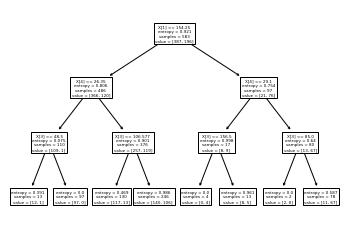

In [27]:
tree.plot_tree(_arvore)

In [28]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
y_teste

468    0
148    0
302    1
355    1
515    1
      ..
404    1
390    0
218    0
135    0
260    0
Name: Outcome, Length: 146, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 73.29%


In [32]:
confusion_matrix(y_teste, previsoes_arvore)

array([[89,  2],
       [37, 18]], dtype=int64)

In [33]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82        91
           1       0.90      0.33      0.48        55

    accuracy                           0.73       146
   macro avg       0.80      0.65      0.65       146
weighted avg       0.78      0.73      0.69       146



## Análise de treino

In [34]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
accuracy_score(y_treino, previsoes_treino)

0.7667238421955404

In [36]:
confusion_matrix(y_treino, previsoes_treino)

array([[376,  11],
       [125,  71]], dtype=int64)

Árvore de decisão = 73.29% (treino e teste) - 107 acertos: previsores_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

A matriz de confusão mostra que 89 pacientes do conjunto de teste foram corretamente previstos como tendo diabetes e 18 foram corretamente previstos como não tendo diabetes.

## Random forests

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [39]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [40]:
y_teste

468    0
148    0
302    1
355    1
515    1
      ..
404    1
390    0
218    0
135    0
260    0
Name: Outcome, Length: 146, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 78.77%


In [43]:
confusion_matrix(y_teste, previsoes_random)

array([[82,  9],
       [22, 33]], dtype=int64)

In [44]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        91
           1       0.79      0.60      0.68        55

    accuracy                           0.79       146
   macro avg       0.79      0.75      0.76       146
weighted avg       0.79      0.79      0.78       146



## Análise dados de treino

In [45]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [46]:
accuracy_score(y_treino, previsoes_treino)

0.8250428816466552

In [47]:
confusion_matrix(y_treino, previsoes_treino)

array([[361,  26],
       [ 76, 120]], dtype=int64)

Random Forest = 79% - 115 acertos : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

82 deram como positivo para diabetes e 33 deram negativo, 22 deram falso negativo e 9 para falso positivo

## REGRESSÃO LOGÍSTICA

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=2,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, random_state=1)

In [50]:
logistica.intercept_

array([-8.44883713])

In [51]:
logistica.coef_

array([[ 1.05075284e-01,  3.47654226e-02, -1.42442454e-02,
        -8.70759121e-04,  9.04726228e-02,  9.15723120e-01,
         2.13747875e-02]])

In [52]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 80.82%


In [55]:
confusion_matrix(y_teste, previsoes_logistica)

array([[83,  8],
       [20, 35]], dtype=int64)

In [56]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        91
           1       0.81      0.64      0.71        55

    accuracy                           0.81       146
   macro avg       0.81      0.77      0.78       146
weighted avg       0.81      0.81      0.80       146



## Análise dados de treino

In [57]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [58]:
accuracy_score(y_treino, previsoes_treino)

0.7718696397941681

In [59]:
confusion_matrix(y_treino, previsoes_treino)

array([[344,  43],
       [ 90, 106]], dtype=int64)

Regressão Logística = 80.82%

## Comparação da acurácia

Árvore de decisão = 73.29%

Random Forest = 79%

Regressão Logística = 80.82%